In [ ]:
#import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing all sheets seperately from excel

#please make sure to upload the file before attempting to run the cell

netflix=pd.read_excel("/content/NFLX_DS_data_8_22.xlsx","NFLX Top 10")
rating=pd.read_excel("/content/NFLX_DS_data_8_22.xlsx","IMDb Rating")
runtime=pd.read_excel("/content/NFLX_DS_data_8_22.xlsx","Runtime")


## 1. Identify the English TV show with the most appearances in the top 10 list (you can treat each row in the data as a separate appearance). What were the average weekly viewed hours for that show across all appearances?

In [ ]:
#filter only tv english data
tv_eng=netflix[netflix['category']=="TV (English)"]

In [ ]:
#groupby the show title and sort by count values desc
tv_eng.groupby(by='show_title')['show_title'].count().sort_values(ascending=False).head(3)

show_title
You         18
Manifest    15
Ozark       14
Name: show_title, dtype: int64

In [ ]:
#select only the show with title you
you=tv_eng[tv_eng['show_title']=="You"].sort_values(['week'])

In [ ]:
#group by week and aggregate on the weekly hours viewed. Finding mean of the total weeks
you.groupby(by='week')['weekly_hours_viewed'].sum().mean()

97185000.0

## 2. For the "Films (Non-English)" category, identify the film with lowest IMDb rating. What were the average weekly hours viewed for that film?

In [ ]:
#filter only non english films
film_noneng=netflix[netflix['category']=="Films (Non-English)"]

In [ ]:
#join non english films with rating based on showtitle and title
df_cd = pd.merge(film_noneng, rating, how='inner', left_on="show_title", right_on="title")

Note: All the films with Imdb rating above 0 can be considered as unrated. Therefore taking films with rating more than 0

In [ ]:
# filtering movies with rating more than zero
df_cd[df_cd['rating']>0].sort_values('rating',ignore_index=True).head(1)['show_title']

0    Nobody Sleeps in the Woods Tonight 2
Name: show_title, dtype: object

In [ ]:
#filtering "Nobody Sleeps in the Woods Tonight 2" and finding mean weekly hours viewed
film_noneng[film_noneng['show_title']=="Nobody Sleeps in the Woods Tonight 2"]['weekly_hours_viewed'].mean()

4610000.0

## 3. Identify the film in the “Films (English)” category with the most cumulative weeks in the top 10. How could you approximate how many users watched this film? What assumptions would you make? What risks are there to your approach?

In [ ]:
#filter english films
film_eng=netflix[netflix['category']=="Films (English)"]

In [ ]:
#finding the title with maximum value in cummulative weeks
film_eng[film_eng['cumulative_weeks_in_top_10']==film_eng['cumulative_weeks_in_top_10'].max()]['show_title']

449    Red Notice
Name: show_title, dtype: object

In [ ]:
#checking the total runtime of the movie
runtime[runtime['title']=="Red Notice"]

,title,runtime
9030,Red Notice,118


In [ ]:
#convert runtime to hours
runtime[runtime['title']=="Red Notice"]['runtime']/60

9030    1.966667
Name: runtime, dtype: float64

In [ ]:
 #total weekly hours viewed divided by length of the movie
film_eng[film_eng['show_title']=="Red Notice"]['weekly_hours_viewed'].sum()/1.967

228723945.09405184

In [ ]:
# checking the popularity of the movie
rating[rating['title']=="Red Notice"]

,title,rating
9615,Red Notice,6.3


Since the movie is very popular lets assume atleast 30% will rewatch the movie by week 13

In [ ]:
#sum of all weekly hours viewed for rednotice divided by run time
(film_eng[film_eng['show_title']=="Red Notice"]['weekly_hours_viewed'].sum()/1.967) * 0.70

160106761.56583628

## 4.  If you plot weekly hours viewed over time (as an aggregate and for each of the four categories), what trends do you notice?

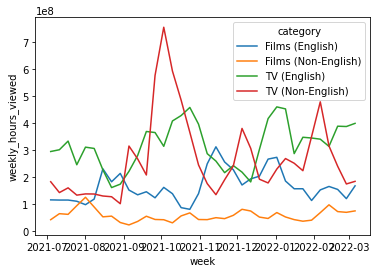

In [ ]:
#
df_week_cat=netflix.groupby(["category","week"]).agg({'weekly_hours_viewed':'sum'}).reset_index()
sns.lineplot(data=df_week_cat,x="week",y="weekly_hours_viewed",hue="category")
sns.set(rc={"figure.figsize":(10, 5)})

In [ ]:
df_week_cat[df_week_cat['weekly_hours_viewed']==df_week_cat['weekly_hours_viewed'].max()]

,category,week,weekly_hours_viewed
121,TV (Non-English),2021-10-03,754510000


## 5. Another key investor question is how many US subscribers Netflix has each quarter. Name one type of dataset you could use to answer this question. How would this data source help you estimate Netflix's US subscribers?

In [ ]:
#group by category and aggregate on weekly hours viewed
netflix.groupby("category")["weekly_hours_viewed"].sum()

category
Films (English)         5952280000
Films (Non-English)     2049760000
TV (English)           11409150000
TV (Non-English)        9547780000
Name: weekly_hours_viewed, dtype: int64